This is Jeremy's Notebook concerning the number of trees per neighborhood.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Import datasets and make a DataFrame for the Area (in acres) of each neighborhood.

In [3]:
treesData = pd.read_csv("PittsburghTrees.csv")
areaData = pd.read_csv("NeighArea.csv")

treesData.id = treesData.id.astype(object)
areaData.Area_in_acres = areaData.Area_in_acres.astype(float)

treesGroup = treesData.groupby("neighborhood").count()


index = 0
neighborhoods = []
areas = []

for i in areaData.iterrows():
    neighborhoods.append(areaData.iloc[index, 0])
    areas.append(areaData.iloc[index, 1])
    index = index + 1


neighborhoodAreas = pd.DataFrame(areas, index=neighborhoods, columns=["Area_in_Acres"])
neighborhoodAreas


/opt/anaconda3/envs/cmpinf0010/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Area_in_Acres
Allegheny Center,134.4
Allegheny West,90.2
Allentown,188.8
Arlington,300.8
Arlington Heights,84.5
...,...
Upper Lawrenceville,259.2
West End,128.0
West Oakland,137.6
Westwood,442.9


Make a dataframe for the number of trees per neighborhood, and merge it with the area dataframe.

In [6]:
index = 0
treeTotals = []
for j in treesGroup.iterrows():
    treeTotals.append(treesGroup.iloc[index, 4])
    index = index + 1
    
neighborhoodTrees = pd.DataFrame(treeTotals, index=neighborhoods, columns=["Number_of_Trees"])
#neighborhoodTrees
#numbCol = treesGroup.iloc[:, 4]
#neighCol = treesGroup.iloc[:, 0]


#neighDictionary = { }
#treesPerNeighborhood = pd.DataFrame(areas, index=neighborhoods, columns =["Number_of_Trees"])
#treesPerNeighborhood.Number_of_trees = treesPerNeighborhood.Number_of_trees.astype(float)


bigDataFrame = neighborhoodTrees.merge(neighborhoodAreas, left_index=True, right_index=True)

bigDataFrame

,Number_of_Trees,Area_in_Acres
Allegheny Center,867,134.4
Allegheny West,386,90.2
Allentown,84,188.8
Arlington,107,300.8
Arlington Heights,5,84.5
...,...,...
Upper Lawrenceville,373,259.2
West End,131,128.0
West Oakland,78,137.6
Westwood,260,442.9


Find the number of trees per acre for each neighborhood, then sort the data to find the neighborhoods with the most trees per acre.

In [7]:
treesPerAcre = []
index = 0
for k in bigDataFrame.iterrows():
    nTrees = float(bigDataFrame.iloc[index, 0])
    nAcres = bigDataFrame.iloc[index, 1]
    
    tempTPA = nTrees / nAcres
    tempTPA = round(tempTPA, 2)
    treesPerAcre.append(tempTPA)
    
    index = index + 1
    
bigDataFrame["Trees_Per_Acre"] = treesPerAcre


sortedDF = bigDataFrame.sort_values("Trees_Per_Acre", ascending=False)
sortedDF.head(10)

,Number_of_Trees,Area_in_Acres,Trees_Per_Acre
Allegheny Center,867,134.4,6.45
Friendship,362,67.8,5.34
Allegheny West,386,90.2,4.28
Central Northside,674,165.8,4.07
Highland Park,2941,744.3,3.95
Manchester,706,178.6,3.95
East Liberty,1365,371.8,3.67
Regent Square,434,122.9,3.53
Crawford-Roberts,567,165.1,3.43
Bloomfield,1435,449.3,3.19


Text(0, 0.5, 'Trees Per Acre')

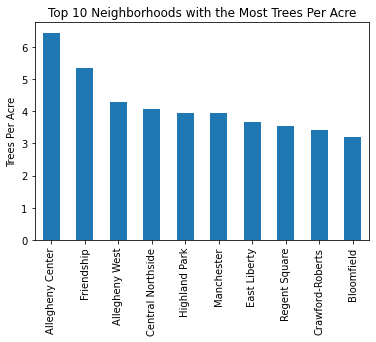

In [18]:
top10byAcre = sortedDF.head(10)
top10byAcre["Trees_Per_Acre"].plot.bar(title="Top 10 Neighborhoods with the Most Trees Per Acre")
plt.ylabel("Trees Per Acre")

It is interesting that if you don't take area into account and simply rank each neighborhood based on number of trees, you get very different results. The number 1 result (Squirrel Hill South) is not even in the *top ten* for Trees per Acre.

In [19]:
sortedTreesGroup = bigDataFrame.sort_values("Number_of_Trees", ascending= False)
sortedTreesGroup.head(10)

,Number_of_Trees,Area_in_Acres,Trees_Per_Acre
Squirrel Hill South,5073,1709.4,2.97
Highland Park,2941,744.3,3.95
Squirrel Hill North,2083,782.1,2.66
South Side Flats,1693,599.0,2.83
Shadyside,1557,589.4,2.64
Bloomfield,1435,449.3,3.19
East Liberty,1365,371.8,3.67
Point Breeze,1316,642.6,2.05
Perry North,1007,775.7,1.30
Central Business District,1002,409.6,2.45


Create a bar graph for the top 10.

Text(0, 0.5, 'Number of Trees')

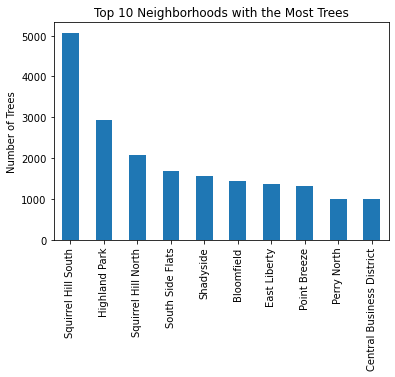

In [16]:
top10numbTrees = sortedTreesGroup.head(10)
top10numbTrees["Number_of_Trees"].plot.bar(title="Top 10 Neighborhoods with the Most Trees")
plt.ylabel("Number of Trees")

This is another change